# Занятие 6 
# Прикладная алгебра и численные методы
## Многочлены Чебышева

In [1]:
#!python -m pip install sympy --upgrade

In [2]:
#!python -m pip install numpy --upgrade

In [3]:
import numpy as np
import sympy
from sympy import S, latex, Eq
from sympy.functions.special.polynomials import chebyshevt, chebyshevu
from numpy.polynomial.chebyshev import chebinterpolate, Chebyshev
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

In [4]:
sympy.__version__, np.__version__

('1.11.1', '1.24.2')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Чебышева первого рода
$T_0(x) = 1$, $T_1(x) = x$, $T_n(x) = 2xT_{n - 1}(x) - T_{n - 2}(x)$, $n\ge 2$.
## Пример 1
Построим графики многочленов Чебышева первого рода при $n = 4, 5$.

<IPython.core.display.Latex object>

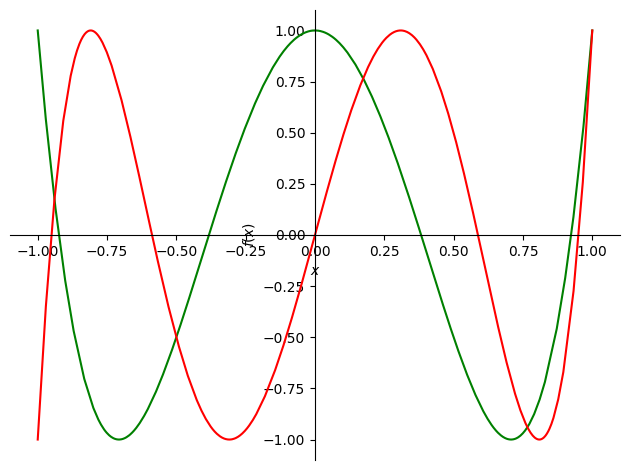

In [5]:
x = S('x')
def T(n, x):
  if n == 0:
    return 1
  if n == 1:
    return x
  return sympy.expand(sympy.simplify(2 * x * T(n - 1, x) - T(n - 2, x)))

display(Latex(f'T(4, x) = {latex(T(4, x))},\\\\T(5, x) = {latex(T(5, x))}'))
p = sympy.plot(T(4, x), (x, -1, 1), line_color='green', show=False)
p.extend(sympy.plot(T(5, x), (x, -1, 1), line_color='red', show=False))
p.show()

## Пример 2.
$$
T_n(x) = \frac{(x + \sqrt{x^2 - 1})^n + (x - \sqrt{x^2 - 1})^n}{2}, \quad |x| \ge 1.
$$
Построим многочлен Чебышева первого рода порядка 15 по приведенной выше формуле и по рекурсивной формуле Примера 1.

На сетке значений $x$ от 2 до 3 с шагом 0.001 вычислим нормы разностей значений многочлена Чебышева, полученных двумя способами.

0.0209 0.0013 0.0006


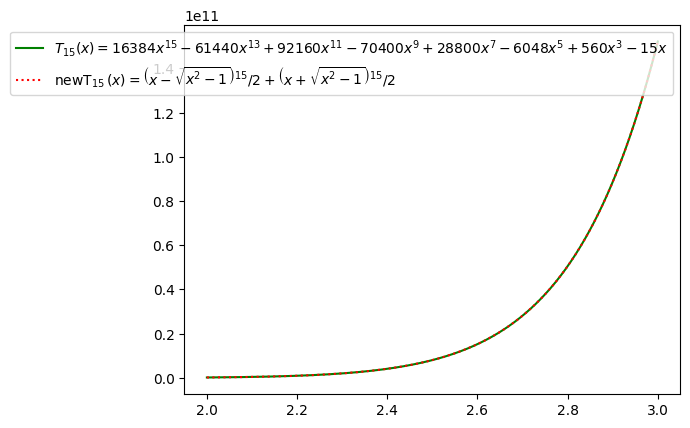

In [6]:
def T_new(n, x):
  return ((x + sympy.sqrt(x ** 2 - 1)) ** n + (x - sympy.sqrt(x ** 2 - 1)) ** n) / 2

X = np.linspace(2, 3, 1001)
Y1 = sympy.lambdify(x, T(15, x))(X)
Y2 = sympy.lambdify(x, T_new(15, x))(X)

print(*[round(np.linalg.norm(Y1 - Y2, k), 4) for k in [1, 2, 3]])
plt.plot(X, Y1, 'g-',
         label=sympy.latex(sympy.Eq(S('T15(x)'), T(15, x)), mode='inline'))
plt.plot(X, Y2, 'r:',
         label=sympy.latex(sympy.Eq(S('newT15(x)'), T_new(15, x)),
                           mode='inline'))
plt.legend()

## Пример 3
Многочлен Чебышева второго рода:
$$
U_n = \frac{1}{n + 1}T'_{n + 1}(x), \quad n \ge 0.
$$
$$
U_n(x) = \frac{(x + \sqrt{x^2 - 1})^{n + 1} - (x - \sqrt{x^2 - 1})^{n + 1}}{2\sqrt{x^2 - 1}}, \quad |x| \ge 1.
$$

Построим многочлен Чебышева степени 7 двумя способами, сравним нормы разностей на сетке как в Примере 2.

In [7]:
def U(n, x):
    return (T(n + 1, x).diff(x)/(n + 1)).expand().simplify()

def U_new(n, x):
    return (((x + sympy.sqrt(x ** 2 - 1)) ** (n + 1)\
             - (x - sympy.sqrt(x ** 2 - 1)) ** (n + 1))\
             / (2 * sympy.sqrt(x ** 2 - 1))).expand().simplify()

def U1(n, x):
    return (T_new(n + 1, x).diff(x) / (n + 1)).expand().simplify()

display(Latex('U(7, x) = {},\\\\U_{{new}}(7, x) = {},\\\\\
U_1(7, x) = {}'.format(*[latex(item) for item in (U(7, x),
                                                  U_new(7, x),
                                                  U1(7, x))])))    


<IPython.core.display.Latex object>

## Многочлен Чебышева в Sympy.
В sympy.functions.special.polynomials есть chebyshevt и chebyshevu,
возвращающие соответственно многочлен Чебышева первого и второго рода, аргументы - порядок многочлена и переменная.

## Пример 4.
Построим полиномы Чебышева первого и второго рода порядка 5:

In [8]:
display(Latex(f'chebyshevt(5, x) = {latex(chebyshevt(5, x))}, \\\\\
chebyshevu(5, x) = {latex(chebyshevu(5, x))}'))  

<IPython.core.display.Latex object>

## Пример 5
Норма Чебышева (максимум модуля на данном отрезке):
$$
|f|_0 = \max_{[-1, 1]}|f(x)|.
$$
Площадь под графиком функции на данном отрезке:
$$
|f|_1 = \int_{-1}^1|f(x)|\,dx.
$$
Вычислить норму Чебышева и площадь под графиком для $f(x) = \frac{x^3}{e^x}$ на отрезке [-1, 1].

In [27]:
x = S('x')

def f5(x):
  return sympy.Abs(x ** 3 / sympy.exp(x))

f5_norm0 = sympy.calculus.util.maximum(f5(x), x, domain=sympy.Interval(-1, 1))
f5_norm1 = sympy.Abs(f5(x)).integrate((x, -1, 1))
display(*[Latex('|f4|_{2} = {0} = {1}\
'.format(latex(item),
         round(item, 3), i)) for i, item in enumerate((f5_norm0, f5_norm1))])

ValueError: 
Can't calculate derivative wrt 0.

## Пример 6
Наилучшее приближение функции $f(x)$ многочленом степени $\le n$:
$$
\tilde{f}(x) = \sum_{i=0}^n \frac{<T_i, f>}{<T_i, T_i>}T_i(x),
$$
$T_i(x)$ многочлен Чебышева первого рода степени $i$,
$$
<f, g> = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1 - x^2}}\,dx, \quad 
|f| = \sqrt{<f, f>} = \sqrt{\int_{-1}^1 \frac{f^2(x)}{\sqrt{1 - x^2}}\,dx}
$$

Построим многочлен степени не выше 3, наилучшим образом приближающий $x^5 - 1$ на [-1, 1]

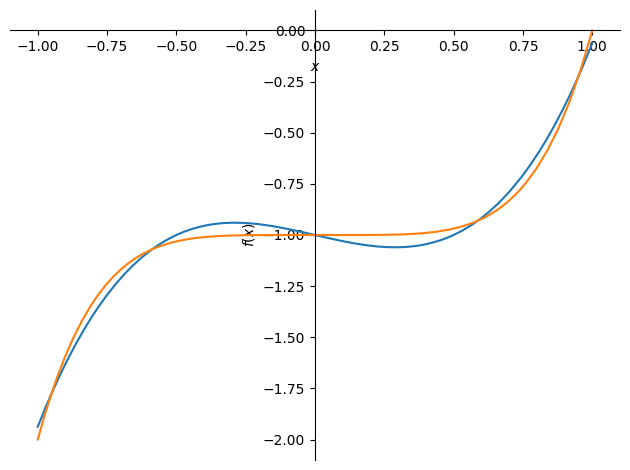

Eq(x**5 - 1, 5*x**3/4 - 5*x/16 - 1)

In [28]:
def f6(x):
    return x ** 5 - 1

def dot_prod_cheb(f, g, x):
    return (f * g / sympy.sqrt(1 - x ** 2)).integrate((x, -1, 1))

def f_cheb(f, n, x):
    res = 0
    for k in range(n + 1):
        cheb_k = chebyshevt(k, x)
        coef = dot_prod_cheb(cheb_k, f, x) / dot_prod_cheb(cheb_k, cheb_k, x)
        res += coef * cheb_k
    return res
   
x = S('x')
res6 = f_cheb(f6(x), 3, x)   
sympy.plot((res6, (x, -1, 1)), (f6(x), (x, -1, 1)))  
display(Eq(f6(x), res6))

## Наилучшее приближение функции $f(x)$ многочленом Чебышева, Numpy.

https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.Chebyshev.html

Для построения многочлена Чебышева используем chebinterpolate из 
numpy.polynomial.chebyshev 

Первый (обязательный) аргумент  chebinterpolate - имя функции, второй - порядок многочлена.

Возвращает chebinterpolate коэффициенты $a_i$ при многочленах Чебышева, в порядке возрастания степени:
$$
f(x) = a_0T_0 + a_1T_1 + ... + a_nT_n.
$$
## Пример 7
Построим многочлен Чебышева для Примера 6 с помощью chebinterpolate.



In [11]:
res7 = chebinterpolate(f6, 3)
res7

array([-1.00000000e+00,  6.25000000e-01,  2.77555756e-17,  2.50000000e-01])

Получили коэффициенты при полиномах Чебышева в порядке возрастания степеней (от 0-й и выше).

Представим функцию $f_6$ с помощью полиномов Чебышева:

In [12]:
res7poly = sum([res7[k] * chebyshevt(k, x) for k in range(len(res7))])
display(res7poly.evalf(2)) 

1.0*x**3 + 5.6e-17*x**2 - 0.13*x - 1.0

Можно составить линейную комбинацию полиномов Чебышева с полученными коэффициентами с помощью Chebyshev:

In [13]:
cheb7 = Chebyshev(res7)
display(cheb7)

Chebyshev([-1.00000000e+00,  6.25000000e-01,  2.77555756e-17,  2.50000000e-01], domain=[-1,  1], window=[-1,  1], symbol='x')

cheb7 - функция, с ее помощью можно вычислять значения приближения нашей функции полиномами Чебышева в отдельных точках или на сетке.

Изобразим на одном графике функцию $f_6$ и ее представление полиномами Чебышева, полученными с помощью Sympy и Numpy:

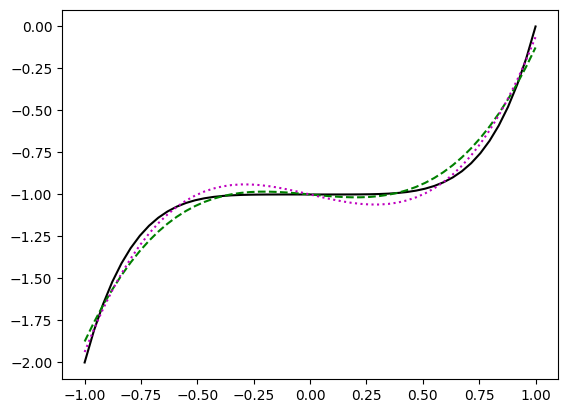

In [14]:
X = np.linspace(-1, 1)
plt.plot(X, f6(X), 'k-', X, cheb7(X), 'g--',
         X, sympy.lambdify(x, res6)(X), 'm:')

Представления $f_6$, полученные с помощью Sympy и Numpy несколько различаются. 

Сравним нормы разностей функции $f_6$ и ее разложений:

In [15]:
for item, name in zip((res7poly, res6), ('||f6 - res7poly||', '||f6 - res6||')):
    f7_norm0 = sympy.calculus.util.maximum(f6(x) - item, x, domain=sympy.Interval(-1, 1))
    f7_norm1 = sympy.Abs(f6(x) - item).integrate((x, -1, 1))
    print(f'{name}_0 = {round(f7_norm0, 3)}, {name}_1 = {round(f7_norm1, 3)}')  

||f6 - res7poly||_0 = 0.125, ||f6 - res7poly||_1 = 0.076
||f6 - res6||_0 = 0.062, ||f6 - res6||_1 = 0.079


Как видно, у разложения Numpy меньше максимум модуля отклонения от функции на отрезке [-1, 1], а у разложения Sympy - площадь между графиками функции и ее разложения. 

## Пример 8
Посмотрим, как Numpy и Sympy раскладывают по полиномам Чебышева $T_4 = 8x^4 - 8x^2 + 1$ в полином степени не больше 4.

In [16]:
deg = 4
cheb8 = Chebyshev(chebinterpolate(lambda x: 8 * x ** 4 - 8 * x ** 2 + 1, deg))
display(cheb8)

Chebyshev([ 8.88178420e-17,  3.68576438e-18, -3.75041042e-17, -1.82439947e-18,
        1.00000000e+00], domain=[-1,  1], window=[-1,  1], symbol='x')

Отметим на графике нули и экстремумы нашего полинома Чебышева:

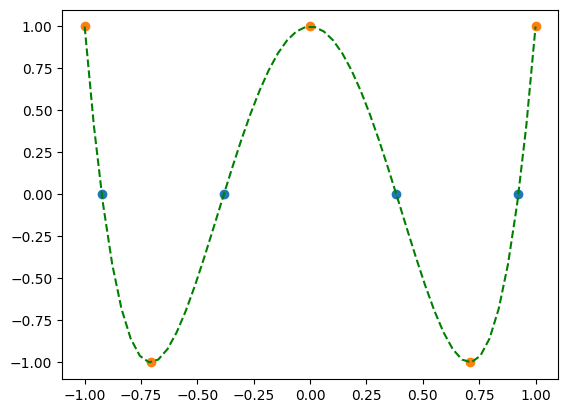

In [17]:
X = np.linspace(-1, 1)
points1 = np.polynomial.chebyshev.chebpts1(deg)
points2 = np.polynomial.chebyshev.chebpts2(deg + 1) 
plt.plot(X, cheb8(X), 'g--')
plt.scatter(points1, cheb8(points1))
plt.scatter(points2, cheb8(points2))